In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import preprocessing
%matplotlib inline

# Prepare Predictors

In [2]:
def standardize_index(df):
    new_df = pd.DataFrame()
    # round down timestamps to nearest min
    new_df = df.set_index(
                pd.to_datetime(df.index).floor('min'))

    # remove instances with duplicated index
    new_df = new_df[
                [not d for d in new_df.index.duplicated()]]

    # set the index to every minute mark
    new_df = new_df.reindex(
                pd.date_range(
                    "2017-05-01 00:00:00",
                    "2017-11-30 23:59:00",
                    freq='min'))

    # forward and backward fill any newly created rows
    new_df = new_df.fillna(method='ffill')
    new_df = new_df.fillna(method='bfill')
    
    return new_df

def rename_df_columns(df, chiller_num):
    result = {}
    for col in df.columns:
        result[str(col)] = str(col) + "_CH" + str(chiller_num)
    return result

def rename_conflow_columns(df):
    result = {}
    for col in df.columns:
        result[str(col)] = str(col) + "_conflow"
    return result

def rename_evaflow_columns(df):
    result = {}
    for col in df.columns:
        result[str(col)] = str(col) + "_evaflow"
    return result

In [3]:
#Upload the Data
power_data = pd.read_csv("data_combined/power_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)
temp_data = pd.read_csv("data_combined/temp_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)
evaflow_data = pd.read_csv("data_combined/evaflow_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)
conflow_data = pd.read_csv("data_combined/conflow_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)
zonepump_data = pd.read_csv("data_combined/zonepump_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)

In [4]:
# To reduce the complexity of the issue, we focus on just chiller 3

# Filter by Chiller 3
power3 = power_data[power_data['chiller'] == 3]
temp3 = temp_data[temp_data['chiller'] == 3]
evaflow3 = evaflow_data[evaflow_data['chiller'] == 3]
conflow3 = conflow_data[conflow_data['chiller'] == 3]

power3 = power3.sort_index()
temp3 = temp3.sort_index()
evaflow3 = evaflow3.sort_index()
conflow3 = evaflow3.sort_index()

In [5]:
#conflow1 = conflow1.rename(columns=rename_conflow_columns(conflow1))
#conflow2 = conflow2.rename(columns=rename_conflow_columns(conflow2))
conflow3 = conflow3.rename(columns=rename_conflow_columns(conflow3))
#conflow4 = conflow4.rename(columns=rename_conflow_columns(conflow4))

#evaflow1 = evaflow1.rename(columns=rename_evaflow_columns(evaflow1))
#evaflow2 = evaflow2.rename(columns=rename_evaflow_columns(evaflow2))
evaflow3 = evaflow3.rename(columns=rename_evaflow_columns(evaflow3))
#evaflow4 = evaflow4.rename(columns=rename_evaflow_columns(evaflow4))

In [6]:
predictors_list = [power3, temp3, evaflow3, conflow3]

In [7]:
combined_predictors_list = []
chiller_number_list = [3,3,3,3]
for i in range(len(chiller_number_list)):
    temp_df = predictors_list[i].rename(columns=rename_df_columns(predictors_list[i], chiller_number_list[i]))
    combined_predictors_list.append(standardize_index(temp_df))

In [8]:
combined_predictors = pd.concat(combined_predictors_list, axis=1)

In [9]:
combined_predictors.describe()

,gatewayId_CH3,linkQuality_CH3,receivedSync_CH3,randTime_CH3,ch1Watt_CH3,ch2Watt_CH3,ch3Watt_CH3,totalPositiveWattHour_CH3,totalNegativeWattHour_CH3,ch1Current_CH3,...,positiveTotalFlow_conflow_CH3,positiveTotalFlowDecimal_conflow_CH3,quality_conflow_CH3,upstream_conflow_CH3,downstream_conflow_CH3,inletTemp_conflow_CH3,outletTemp_conflow_CH3,degree_conflow_CH3,unit_conflow_CH3,chiller_conflow_CH3
count,308160.000000,308160.000000,0.0,0.0,308160.000000,308160.000000,308160.000000,3.081600e+05,3.081600e+05,308160.000000,...,3.081600e+05,3.081600e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308160.0
mean,17.974241,174.183009,NaN,NaN,11421.705685,10250.680465,10099.237659,2.334940e+08,1.446984e+08,58.447049,...,5.281857e+07,1.052794e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
std,0.680446,13.202813,NaN,NaN,18644.308966,16806.410656,16708.037170,5.433744e+07,3.173250e+07,94.127311,...,2.738017e+07,1.193236e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,0.000000,99.000000,NaN,NaN,0.000000,0.000000,0.000000,1.534707e+08,9.999130e+07,0.000000,...,1.000000e+00,9.143626e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
25%,18.000000,173.000000,NaN,NaN,0.000000,0.000000,0.000000,1.730853e+08,1.100304e+08,0.000000,...,3.105250e+07,1.048336e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
50%,18.000000,176.000000,NaN,NaN,0.000000,0.000000,0.000000,2.319586e+08,1.409569e+08,0.000000,...,5.013569e+07,1.056957e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
75%,18.000000,178.000000,NaN,NaN,21135.000000,18273.000000,17723.000000,2.812158e+08,1.722334e+08,112.554949,...,7.812057e+07,1.061024e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
max,18.000000,220.000000,NaN,NaN,82376.000000,72944.000000,74304.000000,3.137314e+08,1.947330e+08,393.082573,...,9.999980e+07,1.065353e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [10]:
inputList = ['value1_CH3','value2_CH3','value3_CH3','value4_CH3','value5_CH3', 'totalFlowRate_evaflow_CH3', 'totalPositiveWattHour_CH3', 'totalNegativeWattHour_CH3']
testPredictors = pd.DataFrame()
for i in inputList:
    testPredictors[i] = combined_predictors[i]
    
testPredictors = testPredictors.fillna(method='bfill')

In [11]:
hcr = \
 (999.68844162593 \
 * testPredictors['totalFlowRate_evaflow_CH3'] * 0.06 \
 * 4.19 \
 * (testPredictors['value2_CH3'] - testPredictors['value1_CH3'])) \
 / 3600

testPredictors['hcr'] = hcr

In [12]:
testPredictors.describe()

,value1_CH3,value2_CH3,value3_CH3,value4_CH3,value5_CH3,totalFlowRate_evaflow_CH3,totalPositiveWattHour_CH3,totalNegativeWattHour_CH3,hcr
count,308160.000000,308160.000000,308160.000000,308160.000000,308160.0,3.081600e+05,3.081600e+05,3.081600e+05,3.081600e+05
mean,12.231103,16.219637,29.071227,28.390332,0.0,5.273951e+07,2.334940e+08,1.446984e+08,1.525888e+07
std,3.423302,6.183470,3.475322,3.277066,0.0,2.737214e+07,5.433744e+07,3.173250e+07,1.664818e+07
min,0.000000,6.585998,16.989442,16.594237,0.0,4.430000e+02,1.534707e+08,9.999130e+07,-1.162188e+08
25%,9.256286,11.360472,27.019045,26.399537,0.0,3.091331e+07,1.730853e+08,1.100304e+08,3.470516e+06
50%,11.777038,13.571473,29.400940,28.749390,0.0,5.004189e+07,2.319586e+08,1.409569e+08,9.920159e+06
75%,15.130920,21.539612,31.398318,30.885621,0.0,7.812623e+07,2.812158e+08,1.722334e+08,2.051545e+07
max,69.989324,69.989324,41.534729,38.148805,0.0,9.999966e+07,3.137314e+08,1.947330e+08,1.554486e+08


In [13]:
testPredictorsVal = testPredictors.values
testPredictorsNorm = preprocessing.normalize(testPredictorsVal, axis = 0) # along features
testPredictorsNorm = pd.DataFrame(testPredictorsNorm, columns=testPredictors.columns, index=testPredictors.index)

# Prepare Errors 

In [14]:
error_Jul = pd.read_csv("data_errorlog/Equipment Error Log_2017-07-01_2017-07-31.csv")
error_Aug = pd.read_csv("data_errorlog/Equipment Error Log_2017-08-01_2017-08-31.csv")
error_Sep = pd.read_csv("data_errorlog/Equipment Error Log_2017-09-01_2017-09-30.csv")
error_Oct = pd.read_csv("data_errorlog/Equipment Error Log_2017-10-01_2017-10-31.csv")

# Filter "TRIP" Errors
error_Jul['Start'] = pd.to_datetime(error_Jul['Start'])
error_Jul = error_Jul[(error_Jul['Error Type'] == "TRIP") & (error_Jul['Equipment ID'] == 'ch3')].set_index('Start')

error_Aug['Start'] = pd.to_datetime(error_Aug['Start'])
error_Aug = error_Aug[(error_Aug['Error Type'] == "TRIP") & (error_Aug['Equipment ID'] == 'ch3')].set_index('Start')

error_Sep['Start'] = pd.to_datetime(error_Sep['Start'])
error_Sep = error_Sep[(error_Sep['Error Type'] == "TRIP") & (error_Sep['Equipment ID'] == 'ch3')].set_index('Start')

error_Oct['Start'] = pd.to_datetime(error_Oct['Start'])
error_Oct = error_Oct[(error_Oct['Error Type'] == "TRIP") & (error_Oct['Equipment ID'] == 'ch3')].set_index('Start')

frames = [error_Jul, error_Aug, error_Sep, error_Oct]
error_Total = pd.concat(frames)

In [15]:
tripErrors = pd.DataFrame()

tripErrors['label'] = [1 for i in range(len(error_Total))]

tripErrors = tripErrors.set_index(
                        pd.to_datetime(error_Total.index).floor('min'))

In [16]:
data = pd.concat([testPredictorsNorm, tripErrors], axis=1, join_axes=[testPredictorsNorm.index])
data = data.fillna(0)

# Visual Analysis of Duration Leading to Error

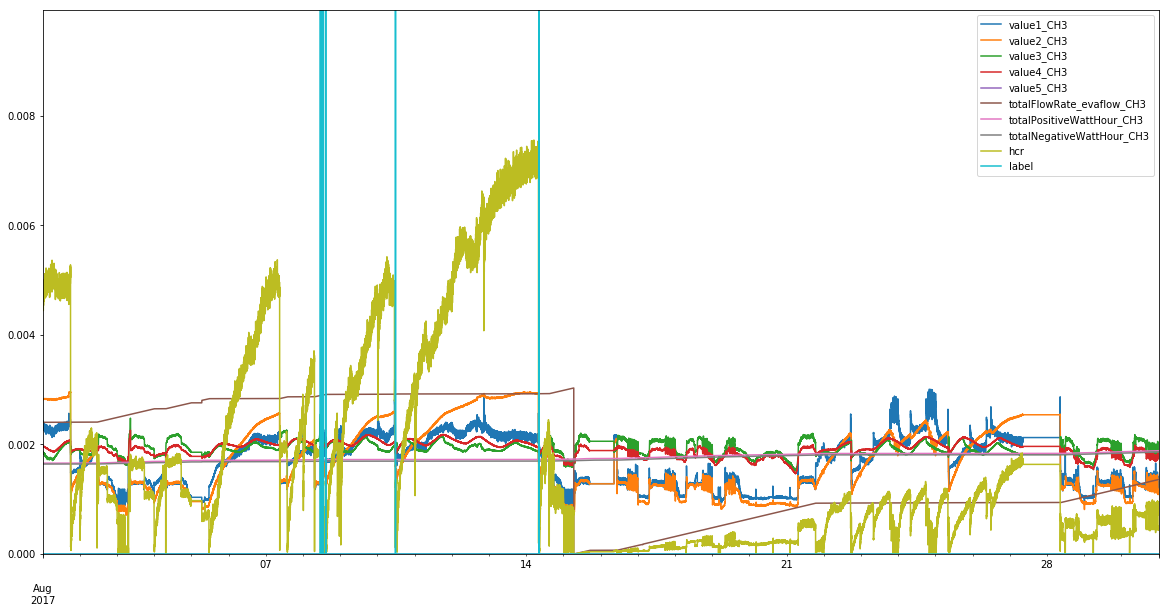

In [33]:
data.plot(xlim = ["2017-08-01 00:00:00", "2017-08-31 00:00:00"], ylim=[0,max(data['value1_CH3'])], figsize = (20,10))

In [18]:
errorDates = data[data['label'] == 1].index
errorDates

DatetimeIndex(['2017-07-19 11:59:00', '2017-08-08 11:14:00',
               '2017-08-08 11:47:00', '2017-08-08 12:34:00',
               '2017-08-08 12:40:00', '2017-08-08 12:50:00',
               '2017-08-08 13:09:00', '2017-08-08 14:40:00',
               '2017-08-10 11:41:00', '2017-08-14 08:15:00',
               '2017-10-03 08:26:00'],
              dtype='datetime64[ns]', freq=None)

# Correlation of Temp3 - Value 1

In [19]:
def corrFrameforTrip(horizon, windowSize, predictorName):
    corrFrame = pd.DataFrame()
    for time in errorDates:
        col = []
        for i in range(windowSize):
            duration= horizon+i
            col.append(data[data.index == time - pd.Timedelta(minutes= duration) ][predictorName][0])
        corrFrame[time] = col
    return corrFrame

In [20]:
bestCorrVal = 0
bestParameters = []
for horizon in range(20, 21, 1):
    for windowSize in range(85, 95, 1):
        corrFrame = corrFrameforTrip(horizon, windowSize, 'value1_CH3')
        matrix = corrFrame.corr()
        result = matrix.mean().mean()
        if(result > bestCorrVal):
            bestCorrVal = result
            bestParameters = [horizon, windowSize]

print(bestCorrVal)
print(bestParameters)

0.4106720552392401
[20, 88]


Starting Point 
Horizon: Range(20,120,20)
windowSize: Range(20,120,20)
result: [20,80]; corr = 0.39

Horizon: Range(20,120,20)
windowSize: Range(60, 100, 5)
result: [20,90]; corr = 0.41

Horizon: Range(20, 21, 1)
windowSize: Range(85, 95, 51)
result: [20, 88]; corr = 0.41

code to verify the dataframe
for time in errorDates:
    print(time - pd.Timedelta(minutes=1))
    
data[data.index == errorDates[1] - pd.Timedelta(minutes= 21)]['value1_CH3']

# Visualise Results for Temp - Value 1

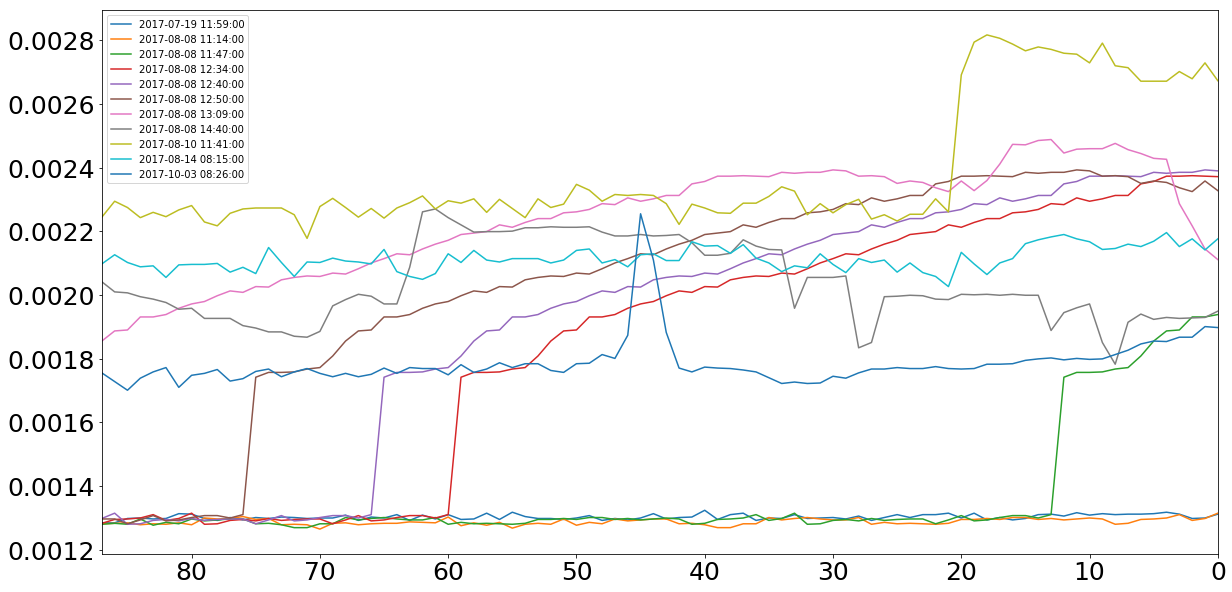

In [21]:
corrFrame = corrFrameforTrip(20, 88, 'value1_CH3')
corrFrame.plot(figsize=(20,10), fontsize = 25).invert_xaxis()
#x-axis is inverted, since t-80 is an older period of time compared to t-20.

# Value 2

In [22]:
bestCorrVal = 0
bestParameters = []
for horizon in range(20, 40, 10):
    for windowSize in range(10, 30, 2):
        corrFrame = corrFrameforTrip(horizon, windowSize, 'value2_CH3')
        matrix = corrFrame.corr()
        result = matrix.mean().mean()
        if(result > bestCorrVal):
            bestCorrVal = result
            bestParameters = [horizon, windowSize]

print(bestCorrVal)
print(bestParameters)

0.32569719988936097
[30, 16]


Starting Point 
Horizon: Range(20,120,20)
windowSize: Range(20,120,20)
result: [20,40]; corr = 0.288

Horizon: Range(20,40,10)
windowSize: Range(20, 60, 10)
result: [30,20]; corr = 0.31

Horizon: Range(20, 40, 10)
windowSize: Range(10, 30, 2)
result: [30, 16]; corr = 0.32

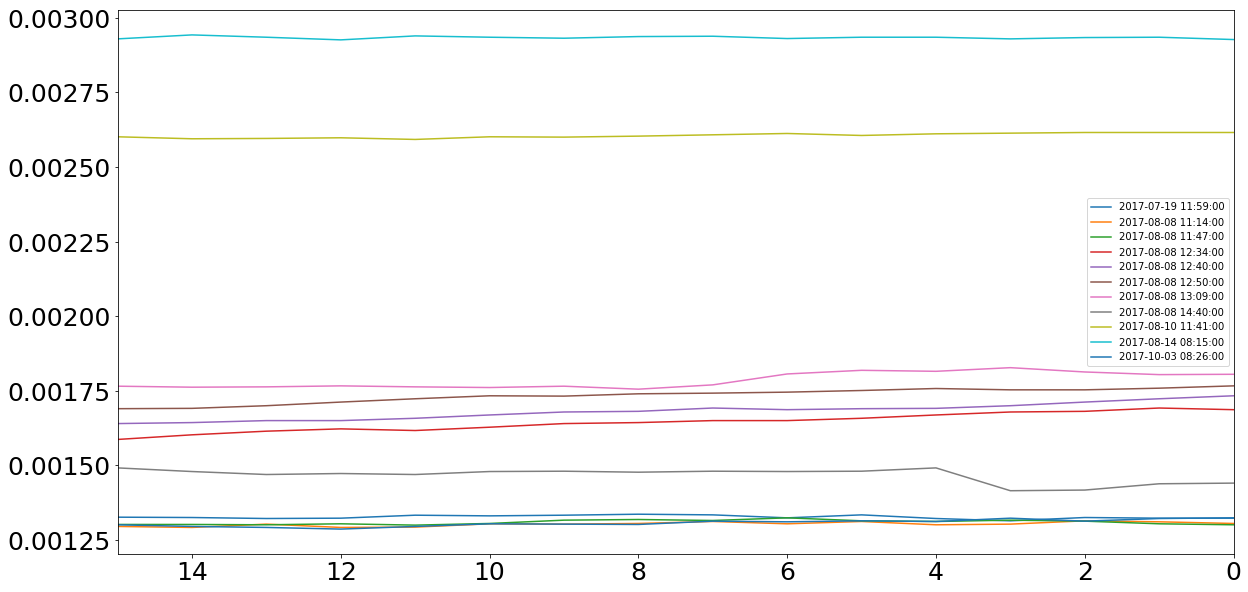

In [23]:
corrFrame = corrFrameforTrip(30, 16, 'value2_CH3')
corrFrame.plot(figsize=(20,10), fontsize = 25).invert_xaxis()

# HCR

In [24]:
bestCorrVal = 0
bestParameters = []
for horizon in range(20, 30, 2):
    for windowSize in range(80, 100, 2):
        corrFrame = corrFrameforTrip(horizon, windowSize, 'hcr')
        matrix = corrFrame.corr()
        result = matrix.mean().mean()
        if(result > bestCorrVal):
            bestCorrVal = result
            bestParameters = [horizon, windowSize]

print(bestCorrVal)
print(bestParameters)

0.30320149335375496
[24, 92]


Starting Point Horizon: Range(20,120,20) windowSize: Range(20,120,20) result: [20,100]; corr = 0.280

Horizon: Range(20,20,2) windowSize: Range(20,60,10) result: [26,90]; corr = 0.294

Horizon: Range(20,30,2) windowSize: Range(80,100, 2) result: [24, 92]; corr = 0.303

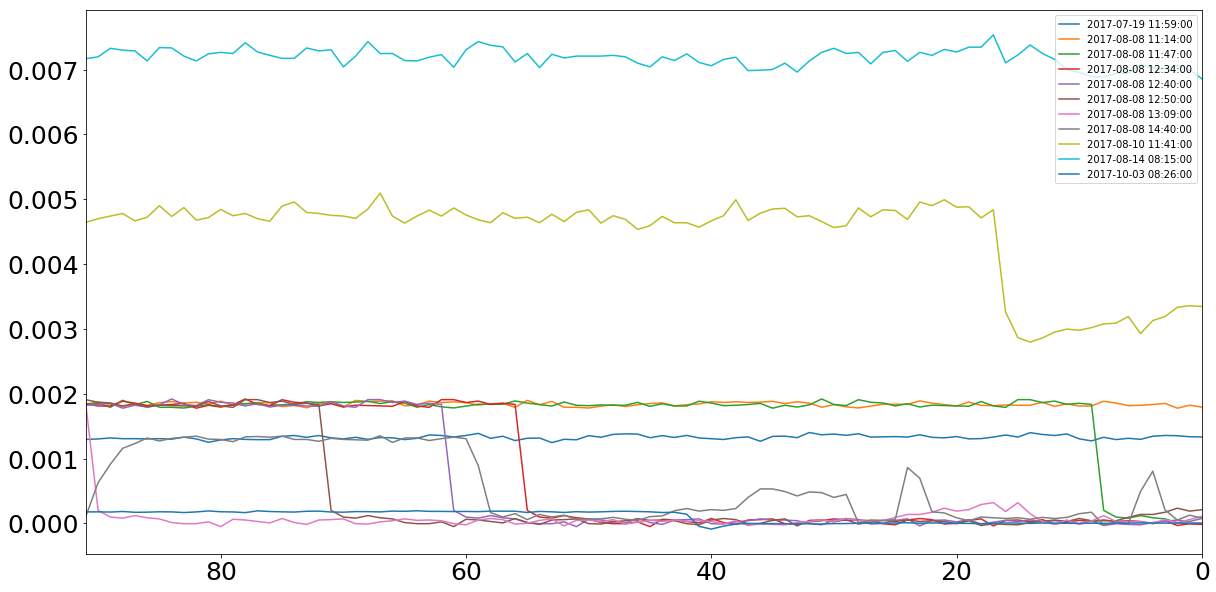

In [25]:
corrFrame = corrFrameforTrip(24, 92, 'hcr')
corrFrame.plot(figsize=(20,10), fontsize = 25).invert_xaxis()

# Test Plots for Predictors

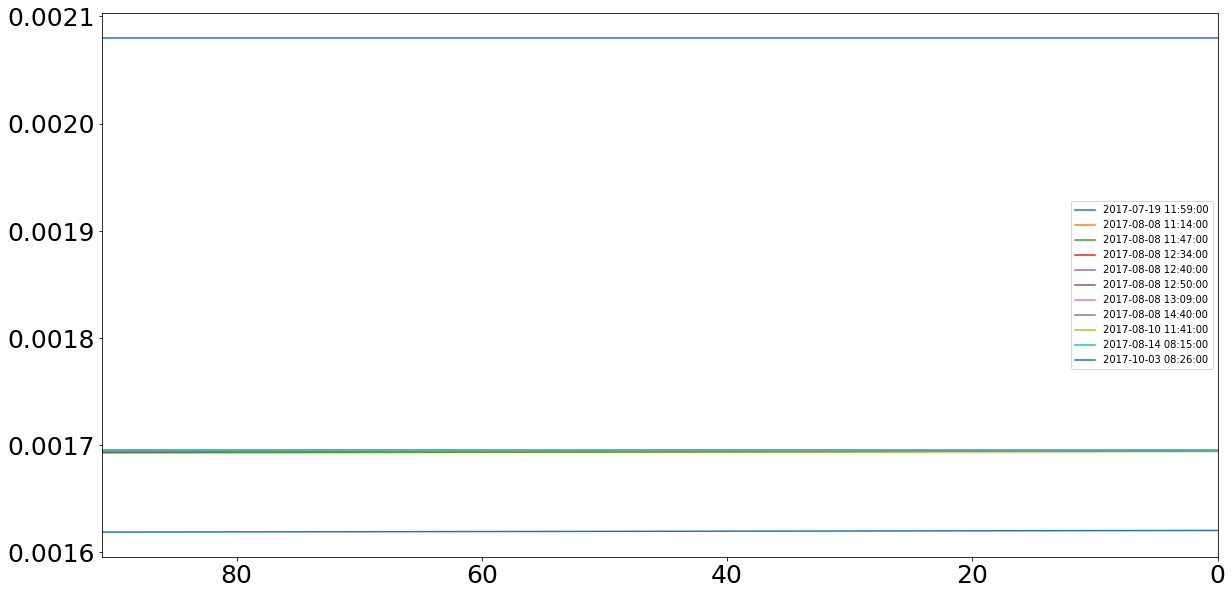

In [26]:
corrFrame = corrFrameforTrip(24, 92, 'totalNegativeWattHour_CH3')
corrFrame.plot(figsize=(20,10), fontsize = 25).invert_xaxis()

# Value 2 (Manual Version)

In [27]:
corrFrameVal2 = pd.DataFrame()
horizon = 20

for time in errorDates:
    col = []
    for i in range(20):
        duration= horizon+i
        col.append(data[data.index == time - pd.Timedelta(minutes= duration) ]['value2_CH3'][0])
    corrFrameVal2[time] = col
        
corrFrameVal2

,2017-07-19 11:59:00,2017-08-08 11:14:00,2017-08-08 11:47:00,2017-08-08 12:34:00,2017-08-08 12:40:00,2017-08-08 12:50:00,2017-08-08 13:09:00,2017-08-08 14:40:00,2017-08-10 11:41:00,2017-08-14 08:15:00,2017-10-03 08:26:00
0,0.001336,0.001316,0.001428,0.001745,0.001766,0.001765,0.001784,0.001437,0.002577,0.002927,0.001388
1,0.001337,0.001308,0.001425,0.001742,0.001759,0.001761,0.001794,0.001424,0.002596,0.002924,0.001386
2,0.001326,0.001320,0.001403,0.001740,0.001753,0.001763,0.001800,0.001428,0.002598,0.002937,0.001374
3,0.001336,0.001315,0.001387,0.001732,0.001753,0.001766,0.001795,0.001428,0.002598,0.002941,0.001374
4,0.001335,0.001301,0.001380,0.001733,0.001758,0.001763,0.001796,0.001427,0.002603,0.002933,0.001365
5,0.001333,0.001304,0.001356,0.001723,0.001751,0.001762,0.001789,0.001432,0.002606,0.002939,0.001365
6,0.001336,0.001294,0.001325,0.001712,0.001745,0.001765,0.001791,0.001429,0.002601,0.002940,0.001355
7,0.001337,0.001300,0.001310,0.001700,0.001742,0.001769,0.001809,0.001441,0.002604,0.002936,0.001342
8,0.001333,0.001294,0.001310,0.001691,0.001740,0.001764,0.001813,0.001461,0.002597,0.002929,0.001336
9,0.001322,0.001304,0.001310,0.001690,0.001732,0.001763,0.001804,0.001449,0.002610,0.002936,0.001327


In [28]:
result2 = corrFrameVal2.corr()
result2

,2017-07-19 11:59:00,2017-08-08 11:14:00,2017-08-08 11:47:00,2017-08-08 12:34:00,2017-08-08 12:40:00,2017-08-08 12:50:00,2017-08-08 13:09:00,2017-08-08 14:40:00,2017-08-10 11:41:00,2017-08-14 08:15:00,2017-10-03 08:26:00
2017-07-19 11:59:00,1.000000,-0.024745,0.415243,0.273288,0.330613,0.054328,-0.567163,0.060172,-0.658725,0.183810,0.427317
2017-08-08 11:14:00,-0.024745,1.000000,0.456569,0.213542,0.085810,-0.062218,-0.104729,-0.166274,-0.183967,0.071105,0.218909
2017-08-08 11:47:00,0.415243,0.456569,1.000000,0.790580,0.664376,0.337696,-0.206493,-0.437572,-0.743346,-0.189229,0.878071
2017-08-08 12:34:00,0.273288,0.213542,0.790580,1.000000,0.960405,0.801890,0.124985,-0.753624,-0.533172,-0.053248,0.963861
2017-08-08 12:40:00,0.330613,0.085810,0.664376,0.960405,1.000000,0.860480,0.102642,-0.724691,-0.511097,-0.056052,0.917789
2017-08-08 12:50:00,0.054328,-0.062218,0.337696,0.801890,0.860480,1.000000,0.467312,-0.619932,-0.214651,0.003946,0.691540
2017-08-08 13:09:00,-0.567163,-0.104729,-0.206493,0.124985,0.102642,0.467312,1.000000,-0.274986,0.382776,-0.219047,-0.018918
2017-08-08 14:40:00,0.060172,-0.166274,-0.437572,-0.753624,-0.724691,-0.619932,-0.274986,1.000000,0.098003,0.074345,-0.641154
2017-08-10 11:41:00,-0.658725,-0.183967,-0.743346,-0.533172,-0.511097,-0.214651,0.382776,0.098003,1.000000,0.159327,-0.680777
2017-08-14 08:15:00,0.183810,0.071105,-0.189229,-0.053248,-0.056052,0.003946,-0.219047,0.074345,0.159327,1.000000,-0.063786


In [36]:
result2.mean().mean()

0.14646500856310576

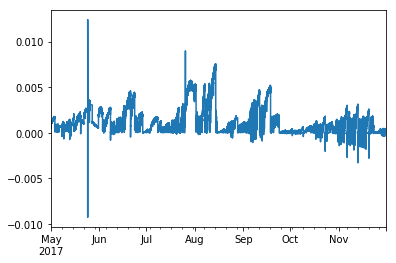

In [32]:
data['hcr'].plot()

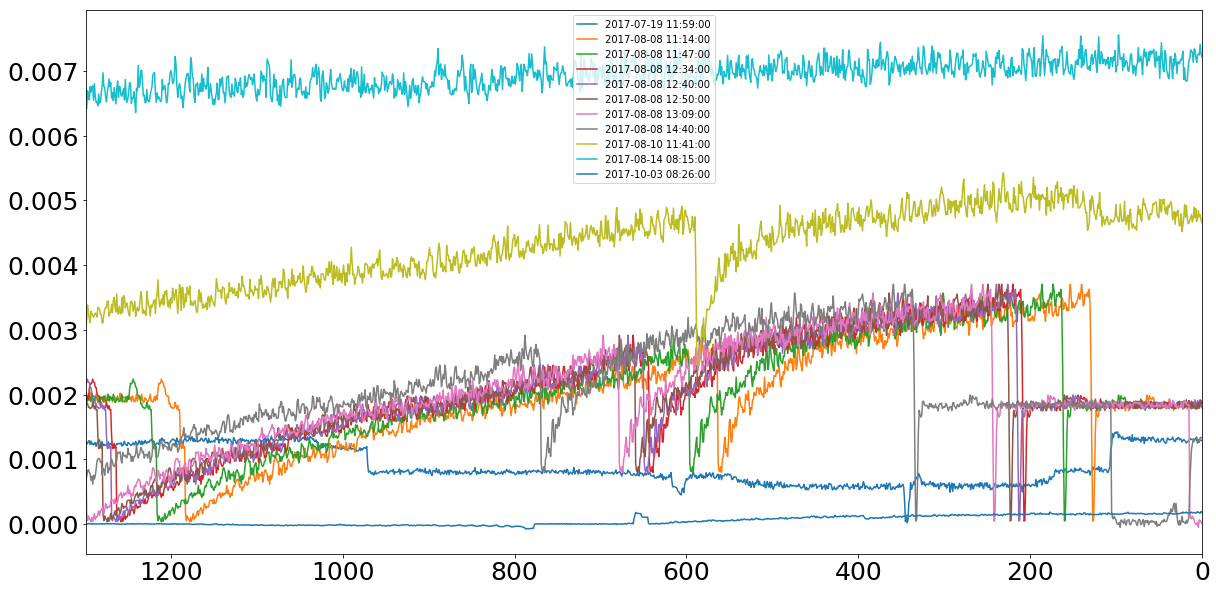

In [37]:
corrFrame = corrFrameforTrip(100, 1300, 'hcr')
corrFrame.plot(figsize=(20,10), fontsize = 25).invert_xaxis()

In [35]:
bestCorrVal = 0
bestParameters = []
for horizon in range(20, 120, 20):
    for windowSize in range(1000, 1800, 100):
        corrFrame = corrFrameforTrip(horizon, windowSize, 'hcr')
        matrix = corrFrame.corr()
        result = matrix.mean().mean()
        if(result > bestCorrVal):
            bestCorrVal = result
            bestParameters = [horizon, windowSize]

print(bestCorrVal)
print(bestParameters)

0.4093979164920686
[100, 1300]
